# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama: Wanda Azilla**
- **Email: azillawanda28@gmail.com**
- **ID Dicoding: wanda_azilla**

## Menentukan Pertanyaan Bisnis

**Pertanyaan**
1. Bagaimana mengelompokkan pelanggan berdasarkan Recency, Frequency, dan Monetary value untuk mengidentifikasi pelanggan?
2. Apa kategori produk yang menghasilkan penjualan terbanyak, dan di wilayah geografis mana produk tersebut tersebar?
3. Bagaimana demografi pelanggan yang dimiliki berdasarkan wilayahnya?

## Import Library

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

### customers_dataset.csv

In [194]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### geolocation_dataset.csv

In [195]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### order_items_dataset.csv

In [196]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### order_payments_dataset.csv

In [197]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### order_reviews_dataset.csv

In [199]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### orders_dataset.csv

In [200]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### product_category_name_translation.csv

In [201]:
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### products_dataset.csv

In [202]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### sellers_dataset.csv

In [203]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Insight:
Terdapat 9 dataset yang akan dianalisis
- 1. Data customers_df (customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state)
- 2. Data geolocation_df (geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state)
- 3. Data order_items_df (order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value)
- 4. Data order_payments_df (order_id, payment_sequential, payment_type, payment_installments, payment_value)
- 5. Data order_reviews_df (review_id, order_id, review_score, review_comment_message, review_creation_date, review_answer_timestamp)
- 6. Data orders_df (order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date)
- 7. Data product_category_df (product_category_name, product_categoty_name_english)
- 8. Data products_df (product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm)
- 9. Data sellers_df (seller_id, seller_zip_code_prefix, seller_city, seller_state)

# Assessing Data

### Menilai tabel customers_df
**(Data Bersih dan siap dianalisis)**

Tidak ada missing value

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai Tabel geolocation_df
**(Data perlu dibersihkan)**

Tidak ada missing value

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Terdapat duplikasi

In [ ]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Menilai tabel order_items_df
**(Data perlu dibersihkan)**

- Tidak ada missing value
- Kolom shipping_limit_date memiliki Dtype object sehingga harus diganti dengan Dtype datetime

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai Tabel order_payments_df
**(Data bersih dan siap dianalisis)**

Tidak ada missing value

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai Tabel order_reviews_df
**(Data perlu dibersihkan)**

- Terdapat missing value
- Kolom review_answer_timestamp memiliki Dtype object sehingga harus diganti dengan Dtype datetime

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menilai Tabel orders_df
**(Data perlu dibersihkan)**

- Terdapat missing value
- Kolom (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) memiliki Dtype object sehingga harus diganti dengan Dtype datetime

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai Tabel product_category_df
**(Data bersih dan siap dianalisis)**

Tidak ada missing value

In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Menilai Tabel products_df
**(Data perlu dibersihkan)**

Terdapat missing value

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai Tabel sellers_df
**(Data bersih dan siap dianalisis)**

Tidak ada missing value

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tidak ada duplikasi

In [ ]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Insight :
1. Tabel customers_df bersih dan siap dianalisis.
2. Tabel geolocation_df terdapat duplikasi sehingga perlu dibersihkan.
3. Tabel order_items_df terdapat kolom shipping_limit_date dengan Dtype object sehingga akan diganti dengan Dtype datetime.
4. Tabel order_payments_df bersih dan siap dianalisis.
5. Tabel order_reviews_df terdapat kolom review_answer_timestamp dengan Dtype object sehingga akan diganti dengan Dtype datetime, dan terdapat missing value sehingga perlu dibersihkan.
6. Tabel orders_df terdapat kolom (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) dengan Dtype object sehingga akan diganti dengan Dtype datetime.
7. Tabel product_category_df bersih dan siap dianalisis.
8. Tabel products_df terdapat missing value sehingga perlu dibersihkan.
9. Tabel sellers_df bersih dan siap dianalisis.

## Cleaning Data

### Membersihkan Tabel Data geolocation_df
Membersihkan duplikasi data

In [ ]:
duplikat = geolocation_df[geolocation_df.duplicated(subset='geolocation_zip_code_prefix', keep=False)]
print(duplikat)

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao pa

In [31]:
# Mengelompokkan DataFrame geolocation_df berdasarkan kolom 'geolocation_zip_code_prefix'
geolocation_df_cleaned = geolocation_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': lambda x: x.mode()[0],
    'geolocation_state': lambda x: x.mode()[0]
}).reset_index()

sisa_duplikat = geolocation_df_cleaned[geolocation_df_cleaned.duplicated(subset='geolocation_zip_code_prefix', keep=False)]
print(f"Duplikasi tersisa: {sisa_duplikat.shape[0]}")

Duplikasi tersisa: 0


In [204]:
# Menyimpan tabel geolocation_cleaned_df yang telah dibersihkan
geolocation_df_cleaned.to_csv('geolocation_dataset_cleaned.csv', index=False)

geolocation_cleaned_df = pd.read_csv('geolocation_dataset_cleaned.csv')
geolocation_cleaned_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


### Membersihkan Tabel order_items_df
Mengganti Dtype object menjadi Dtype datetime pada kolom shipping_limit_date

In [205]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Membersihkan Tabel order_reviews_df
Membersihkan missing value

In [ ]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [207]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No title')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No message')

In [208]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Mengganti Dtype object menjadi Dtype datetime pada kolom review_creation_date dan review_answer_timestamp

In [209]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [210]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### Membersihkan Tabel orders_df
Membersihkan missing value

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [211]:
orders_df_cleaned = orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

In [212]:
print(orders_df_cleaned.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [213]:
# Menyimpan tabel orders_cleaned_df yang telah dibersihkan
orders_df_cleaned.to_csv('orders_dataset_cleaned.csv', index=False)

orders_cleaned_df = pd.read_csv('orders_dataset_cleaned.csv')
orders_cleaned_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Mengganti Dtype object menjadi Dtype datetime pada kolom (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date)

In [214]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_cleaned_df[column] = pd.to_datetime(orders_cleaned_df[column])

In [215]:
orders_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 5.9+ MB


### Membersihkan Tabel products_df
Membersihkan missing value

In [ ]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [216]:
products_df.dropna(axis=0, inplace=True)

In [217]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- Seluruh DataFrame telah dibersihkan dan siap untuk dilakukan analisis untuk menjawab pertanyaan bisnis yang telah disiapkan.

# Exploratory Data Analysis (EDA)

## Exploratory untuk mengelompokkan Pelanggan Berdasarkan Recency, Frequency, dan Monetary Value (RFM)
### Explore customers_df, orders_df, order_payments_df

In [168]:
# Menggabungkan dua DataFrame: orders_cleaned_df dan order_payments_df
# Menggunakan kolom 'order_id' sebagai kunci penggabungan
rfm_data = orders_cleaned_df.merge(order_payments_df, on='order_id')
rfm_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [191]:
# Menentukan tanggal snapshot sebagai hari setelah tanggal pembelian terakhir
snapshot_date = rfm_data['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

# Mengelompokkan DataFrame rfm_data berdasarkan 'customer_id' dan menghitung RFM metrics
rfm = data.groupby('customer_id').agg(
    recency=('order_purchase_timestamp', lambda x: (snapshot_date - x.max()).days),
    frequency=('order_id', 'count'),
    monetary=('payment_value', 'sum')
)

rfm_sorted = rfm.sort_values(by='monetary', ascending=False)

print(rfm_sorted[['recency', 'frequency', 'monetary']].head())

                                  recency  frequency  monetary
customer_id                                                   
1617b1357756262bfa56ab541c47bc16      334          1  13664.08
ec5b2ba62e574342386871631fafd3fc       46          1   7274.88
c6e2731c5b391845f6800c97401a43a9      563          1   6929.31
f48d464a0baaea338cb25f816991ab1f       35          1   6922.21
3fd6777bbce08a352fddd04e4a7cc8f6      462          1   6726.66


## Eksploratory untuk Menentukan Kategori Produk dengan Penjualan Tertinggi dan Wilayah Geografis Penyebarannya
### Explore orders_cleaned_df, order_items_df, products_df, sellers_df, geolocation_cleaned_df

In [153]:
# Menggabungkan beberapa DataFrame untuk membentuk DataFrame category_data
category_data = (orders_cleaned_df
        .merge(order_items_df, on='order_id')
        .merge(products_df, on='product_id')
        .merge(sellers_df, on='seller_id')
        .merge(geolocation_cleaned_df, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left'))
category_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350,maua,SP,9350.0,-23.680729,-46.444238,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,31570,belo horizonte,SP,31570.0,-19.807681,-43.980427,belo horizonte,MG
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,14840,guariba,SP,14840.0,-21.363502,-48.229601,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,10.0,20.0,31842,belo horizonte,MG,31842.0,-19.837682,-43.924053,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,15.0,8752,mogi das cruzes,SP,8752.0,-23.543395,-46.262086,mogi das cruzes,SP


In [156]:
all_df['total_sales'] = all_df['price'] + all_df['freight_value']

# Mengelompokkan data berdasarkan kategori produk dan kota, lalu menghitung total penjualan untuk setiap kombinasi
sales_by_category_region = all_df.groupby(['product_category_name_english', 'geolocation_city']).agg({'total_sales': 'sum'}).reset_index()

# Mengelompokkan hasil penjualan berdasarkan kategori produk dan menghitung total penjualan untuk setiap kategori
highest_sales_category = sales_by_category_region.groupby('product_category_name_english').agg({'total_sales': 'sum'}).reset_index()

# Mengurutkan kategori produk berdasarkan total penjualan
highest_sales_category = highest_sales_category.sort_values(by='total_sales', ascending=False)

print("Kategori Produk dengan Penjualan Tertinggi:")
print(highest_sales_category.head())

top_category = highest_sales_category.iloc[0]['product_category_name_english']

performance_by_region = sales_by_category_region[sales_by_category_region['product_category_name_english'] == top_category]
performance_by_region_sorted = performance_by_region.sort_values(by='total_sales', ascending=False)

performance_by_region_sorted = performance_by_region_sorted.drop(columns=['product_category_name_english'])

print(f"\nPenjualan untuk Kategori '{top_category}' di Berbagai Wilayah:\n")
print(performance_by_region_sorted.head())

Kategori Produk dengan Penjualan Tertinggi:
   product_category_name_english  total_sales
43                 health_beauty   1458483.35
70                 watches_gifts   1309437.75
7                 bed_bath_table   1307029.21
65                sports_leisure   1164622.70
15         computers_accessories   1071552.54

Penjualan untuk Kategori 'health_beauty' di Berbagai Wilayah:

      geolocation_city  total_sales
13911        sao paulo    214283.07
13745   rio de janeiro     95416.37
12767   belo horizonte     37887.94
12812         brasilia     32543.58
13034         curitiba     25640.98


## Eksploratory untuk Menentukan Demografi Pelanggan Berdasarkan Wilayah
### Explore customers_df & geolocation_cleaned_df

In [118]:
# Menggabungkan beberapa DataFrame untuk membentuk DataFrame demografi_data
demografi_data = customers_df.merge(geolocation_cleaned_df,
                                          left_on='customer_zip_code_prefix',
                                          right_on='geolocation_zip_code_prefix',
                                          how='left')
demografi_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.498489,-47.396929,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.727992,-46.542848,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.531642,-46.656289,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.499702,-46.185233,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.975100,-47.142925,campinas,SP


In [165]:
# Mengelompokkan data berdasarkan kota dan provinsi untuk menghitung jumlah pelanggan
customer_distribution = all_df.groupby(['geolocation_city', 'geolocation_state']).agg(customer_count=('customer_id', 'count')).reset_index()

# Mengurutkan hasil berdasarkan jumlah pelanggan
customer_distribution_sorted = customer_distribution.sort_values(by='customer_count', ascending=False)

print("Wilayah dengan jumlah pelanggan terbanyak:")
print(customer_distribution_sorted.head(10))

Wilayah dengan jumlah pelanggan terbanyak:
           geolocation_city geolocation_state  customer_count
3653              sao paulo                SP           18290
3192         rio de janeiro                RJ            8004
458          belo horizonte                MG            3214
573                brasilia                DF            2238
1162               curitiba                PR            1792
721                campinas                SP            1714
2991           porto alegre                RS            1625
3285               salvador                BA            1476
1551              guarulhos                SP            1366
3477  sao bernardo do campo                SP            1102


### Explore all_df

In [218]:
# Menggabungkan seluruh DataFrame untuk membentuk DataFrame all_data
all_df = pd.merge(orders_cleaned_df, customers_df, on='customer_id', how='left')
all_df = pd.merge(all_df, order_items_df, on='order_id', how='left')
all_df = pd.merge(all_df, order_payments_df, on='order_id', how='left')
all_df = pd.merge(all_df, order_reviews_df, on='order_id', how='left')
all_df = pd.merge(all_df, products_df, on='product_id', how='left')
all_df = pd.merge(all_df, product_category_df, left_on='product_category_name', right_on='product_category_name', how='left')
all_df = pd.merge(all_df, sellers_df, on='seller_id', how='left')
all_df = pd.merge(all_df, geolocation_cleaned_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350,maua,SP,3149.0,-23.576983,-46.587161,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350,maua,SP,3149.0,-23.576983,-46.587161,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350,maua,SP,3149.0,-23.576983,-46.587161,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,perfumery,31570,belo horizonte,SP,47813.0,-12.177924,-44.660711,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,auto,14840,guariba,SP,75265.0,-16.745150,-48.514783,vianopolis,GO


In [219]:
# Menyimpan tabel all_df yang telah digabungkan
all_df.to_csv('all_data.csv', index=False)

**Insight:**
1. Telah didapatkan 5 pelanggan teratas yang dikelompokkan berdasarkan RFM value.
2. Telah didapatkan 5 kategori produk dengan penjualan tertinggi dan 5 wilayah penyebaran produk tersebut.
3. Telah didapatkan demografi pelanggan berdasarkan 10 wilayah terbanyak.
  

# Visualization & Explanatory Analysis

### Visualisasi Pelanggan Berdasarkan RFM Value

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29752\193751571.py:23: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="monetary", x="short_customer_id", hue="customer_city", data=rfm_customer.sort_values(by="monetary", ascending=False).head(), palette=colors, ax=ax[2], legend=False)


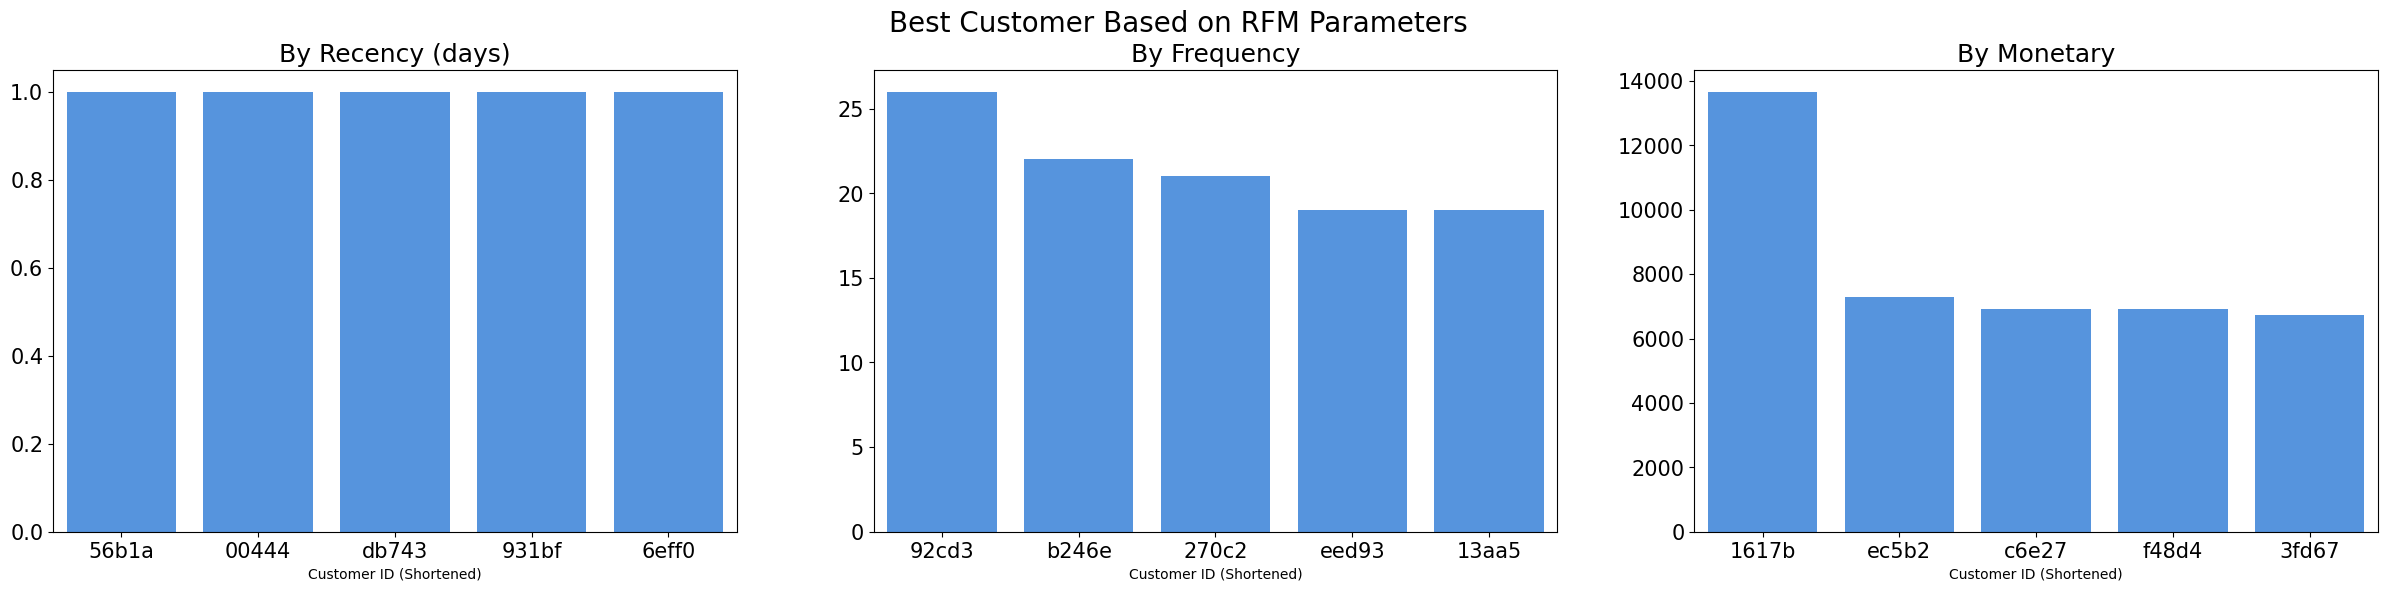

In [141]:
# Menggabungkan DataFrame RFM dengan DataFrame customers_df untuk mendapatkan informasi kota dan provinsi pelanggan
rfm_customer = rfm_sorted.merge(customers_df[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')
rfm_customer['short_customer_id'] = rfm_customer['customer_id'].apply(lambda x: x[:5])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#4092f3"] * 4

# Bar plot untuk 'recency' pelanggan
sns.barplot(y="recency", x="short_customer_id", hue="customer_city", data=rfm_customer.sort_values(by="recency", ascending=True).head(), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Customer ID (Shortened)")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].grid(False)

# Bar plot untuk 'frequency' pelanggan
sns.barplot(y="frequency", x="short_customer_id", hue="customer_city", data=rfm_customer.sort_values(by="frequency", ascending=False).head(), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Customer ID (Shortened)")
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].grid(False)

# Bar plot untuk 'monetary' pelanggan
sns.barplot(y="monetary", x="short_customer_id", hue="customer_city", data=rfm_customer.sort_values(by="monetary", ascending=False).head(), palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel("Customer ID (Shortened)")
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].grid(False)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

### Visualisasi Kategori Produk Penjualan Tertinggi dan Wilayah Geografis Penyebarannya

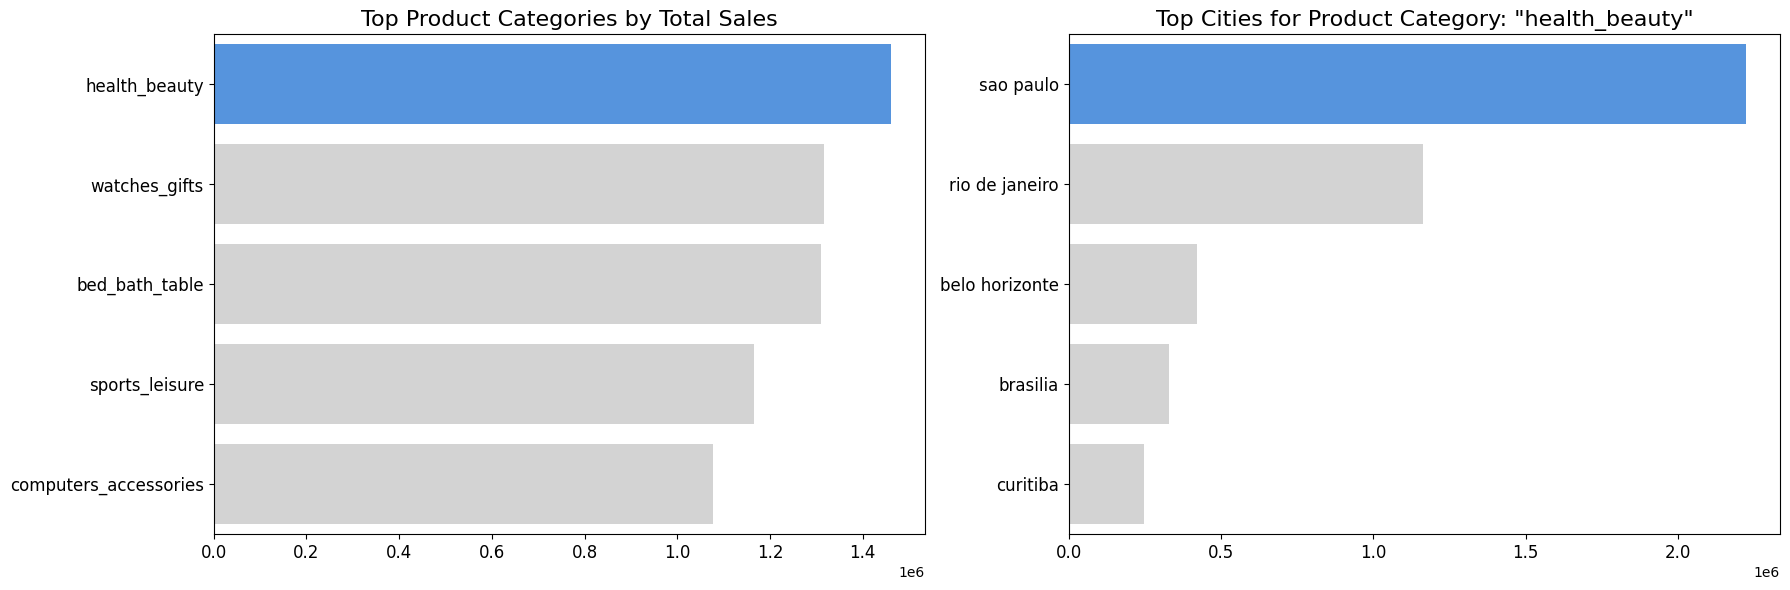

In [139]:
# Menghitung total penjualan untuk setiap kategori produk
category_sales = all_df.groupby('product_category_name_english').agg({'total_sales': 'sum'}).reset_index()

# Mengambil 5 kategori teratas berdasarkan total penjualan
top_5_categories = category_sales.nlargest(5, 'total_sales')

# Menghitung total penjualan untuk setiap kota
sales_by_city = all_df.groupby('geolocation_city').agg({'total_sales': 'sum'}).reset_index()

top_5_cities = sales_by_city.nlargest(5, 'total_sales')
top_product_category = top_5_categories.iloc[0]['product_category_name_english']

colors = ['#4092f3'] + ['#D3D3D3'] * 4

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar plot untuk kategori produk teratas
sns.barplot(x='total_sales', y='product_category_name_english', data=top_5_categories,
            palette=colors, hue='product_category_name_english', legend=False, ax=ax[0])
ax[0].set_title('Top Product Categories by Total Sales', fontsize=16)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].grid(False)

# Bar plot untuk kategori produk teratas
sns.barplot(x='total_sales', y='geolocation_city', data=top_5_cities,
            palette=colors, hue='geolocation_city', legend=False, ax=ax[1])
ax[1].set_title(f'Top Cities for Product Category: \"{top_product_category}\"', fontsize=16)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(False)

plt.tight_layout()
plt.show()

### Visualisasi Demografi Pelanggan Berdasarkan Wilayah

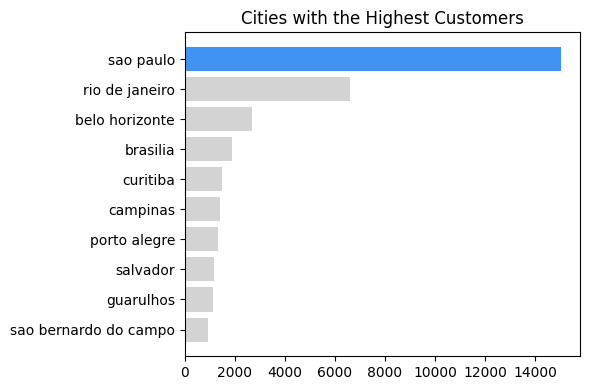

In [164]:
# Menghitung jumlah pelanggan di setiap kota
top_cities = all_df.groupby('geolocation_city').agg(customer_count=('customer_id', 'nunique')).reset_index()
top_cities = top_cities.nlargest(10, 'customer_count')

top_cities = top_cities.sort_values('customer_count', ascending=True)

plt.figure(figsize=(6, 4))

colors = ['#D3D3D3'] * len(top_cities)
colors[-1] = '#4092f3'  

# Membuat bar chart horizontal
plt.barh(top_cities['geolocation_city'], top_cities['customer_count'], color=colors)

plt.title('Cities with the Highest Customers')
plt.xlabel(None)  
plt.ylabel(None) 
plt.tight_layout()  
plt.show()

**Insight:**
1. Visualisasi pelanggan telah dikelompokkan berdasarkan RFM value dengan urutan monetary tertinggi yaitu 13664.08.
2. Visualisasi kategori produk dengan penjualan tertinggi yaitu produk "healty beauty" dengan wilayah penyebaran terbanyak berada di kota sao paulo.
3. Visualisasi demografi jumlah pelanggan terbanyak berada di kota sao paulo berdasarkan 10 wilayah tertinggi.

**Conclusion**

- Pelanggan Berharga : Pelanggan dengan ID Customer Short 1617b memiliki nilai monetary tertinggi 13664.08 menunjukkan adanya pelanggan loyal yang perlu dipertahankan.
- Produk Terlaris : Kategori "healty beauty" memiliki penjualan tertinggi, terutama di Sao Paulo, yang merupakan pasar utama.
- Demografi Pelanggan : Sebesar 18290 pelanggan berasal dari Sao Paulo, menunjukkan potensi untuk strategi pemasaran yang lebih terfokus di wilayah ini.